<a href="https://colab.research.google.com/github/PaletteofDesign/sales_predictions/blob/main/sales_predicitons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 1-3

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df['Item_Weight'].fillna(0, inplace=True)

In [6]:
df['Outlet_Size'].fillna('Unknown', inplace=True)

In [7]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat').replace('reg', 'Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [11]:
 df.sort_values(by= ['Item_Outlet_Sales'], ascending=False).head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,0.000,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,0.000,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,0.000,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,0.000,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,0.000,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
1009,FDU14,0.000,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
7191,NCH18,0.000,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
7752,FDC17,0.000,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688


In [12]:
df.duplicated('Item_Identifier').sum()

6964

In [13]:
df.sort_values(by= ['Item_Visibility'], ascending=False).head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
854,FDU13,0.00,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
3750,NCZ18,0.00,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
1805,FDJ56,0.00,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
7250,FDT24,12.35,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,Unknown,Tier 3,Grocery Store,154.4656
2855,NCE31,7.67,Low Fat,0.309390,Household,33.2216,OUT010,1998,Unknown,Tier 3,Grocery Store,138.4864
4382,FDG32,0.00,Low Fat,0.308145,Fruits and Vegetables,222.0772,OUT019,1985,Small,Tier 1,Grocery Store,889.5088
7603,DRF01,0.00,Low Fat,0.306543,Soft Drinks,147.3102,OUT019,1985,Small,Tier 1,Grocery Store,291.6204
6622,FDI32,0.00,Low Fat,0.305305,Fruits and Vegetables,116.6834,OUT019,1985,Small,Tier 1,Grocery Store,460.7336
3474,FDS12,0.00,Low Fat,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
5150,FDR14,0.00,Low Fat,0.304737,Dairy,54.7298,OUT019,1985,Small,Tier 1,Grocery Store,107.8596


In [14]:
minimum = df['Item_Outlet_Sales'].min()

In [15]:
maximum = df['Item_Outlet_Sales'].max()

In [16]:
average = df['Item_Outlet_Sales'].mean()

In [17]:
df_2 = pd.DataFrame({'lab':['Minimum', 'Average', 'Maximum'], 'val':[minimum, average, maximum]})

In [18]:
df_2.set_index('lab')

,val
lab,
Minimum,33.290000
Average,2181.288914
Maximum,13086.964800


In [19]:
df_2.dtypes

lab     object
val    float64
dtype: object

In [20]:
df_2['val'] = df_2['val'].astype(float)

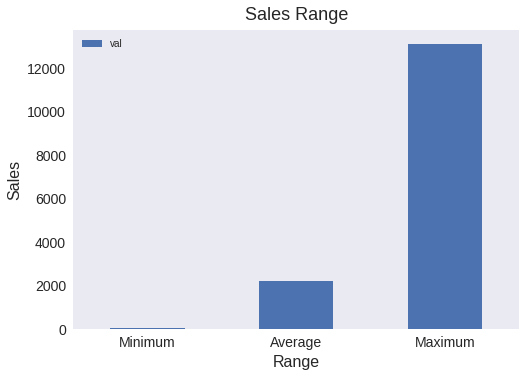

In [21]:
plt.style.use('seaborn')
df_2.plot.bar(x='lab', y='val', grid=False, rot=0)
plt.ylabel('Sales', fontsize=16, labelpad=5)
plt.xlabel('Range', fontsize=16, labelpad=5)
plt.title('Sales Range', fontsize=18, pad=10)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('sales_range.png');

In [22]:
df.groupby(['Item_Identifier']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600000,0.031956,141.865400,2001.166667,1843.600200
DRA24,13.821429,0.048062,164.086800,1995.000000,2246.218971
DRA59,6.202500,0.134718,185.179900,1995.875000,2614.430150
DRB01,4.926667,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115000,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,5.648571,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850000,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500000,0.009044,236.644800,1999.000000,3839.801760


In [23]:
df.loc[:,['Item_Identifier', 'Item_Outlet_Sales']].groupby('Item_Identifier').mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales
Item_Identifier,
FDR45,6035.310550
NCL42,5962.017067
FDU55,5922.457450
FDZ50,5512.824000
DRK23,5464.886400
...,...
NCN29,311.061760
FDX10,291.121050
FDQ04,261.437467


In [24]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Histogram to view the distributions of various features in dataset.

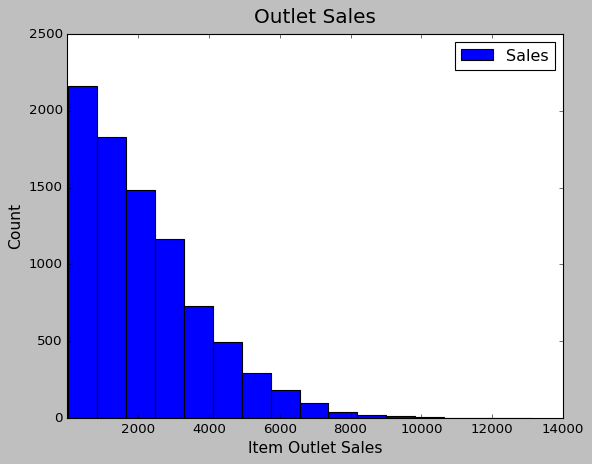

In [25]:
plt.style.use('classic')
df['Item_Outlet_Sales'].hist(bins=16, label='Sales', grid=False)
plt.xlabel('Item Outlet Sales', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Outlet Sales', fontsize=18, pad=10)
plt.xlim(1,14000)
plt.legend()
plt.savefig('sales.png');

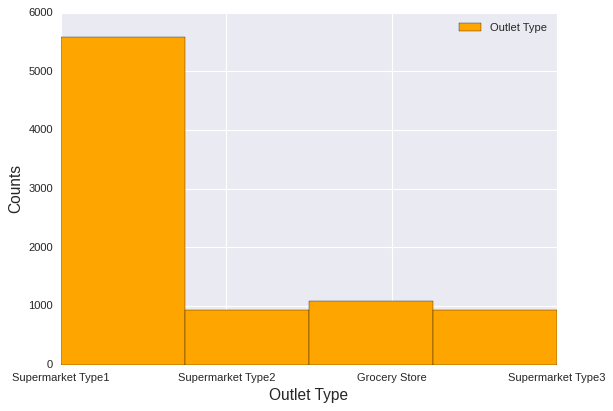

In [26]:
plt.style.use('seaborn')
df['Outlet_Type'].hist(bins=4, label='Outlet Type', facecolor='orange')
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend();

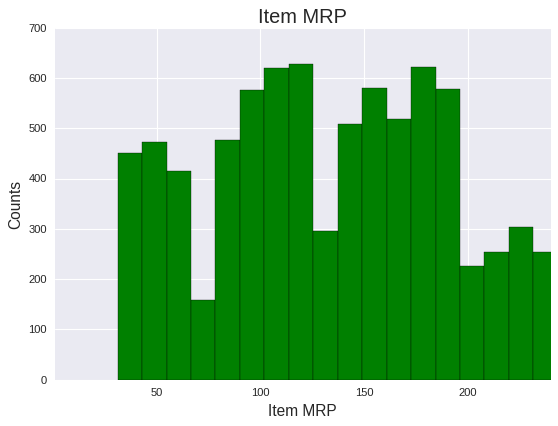

In [27]:
plt.style.use('seaborn')
df['Item_MRP'].hist(bins=20,label='Outlet Type', color='green', edgecolor='black')
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Item MRP', fontsize=18)
plt.xlim(1,240);

Boxplot to view statistical summaries of various features in dataset.

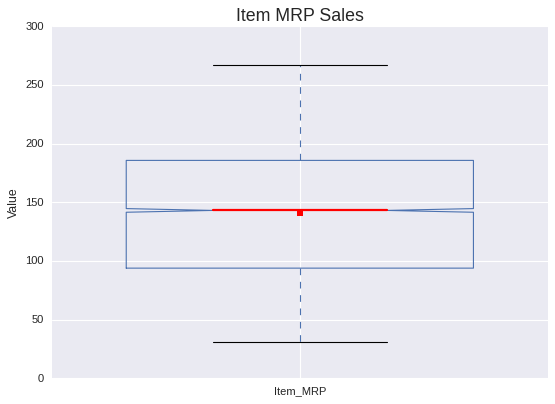

In [28]:
df.boxplot('Item_MRP', widths = .7, patch_artist=False, medianprops = dict(linestyle='-', linewidth=2, color='red'),notch=True, vert=True, showmeans=True, showcaps=True)
plt.ylabel('Value')
plt.title('Item MRP Sales', fontsize=16);

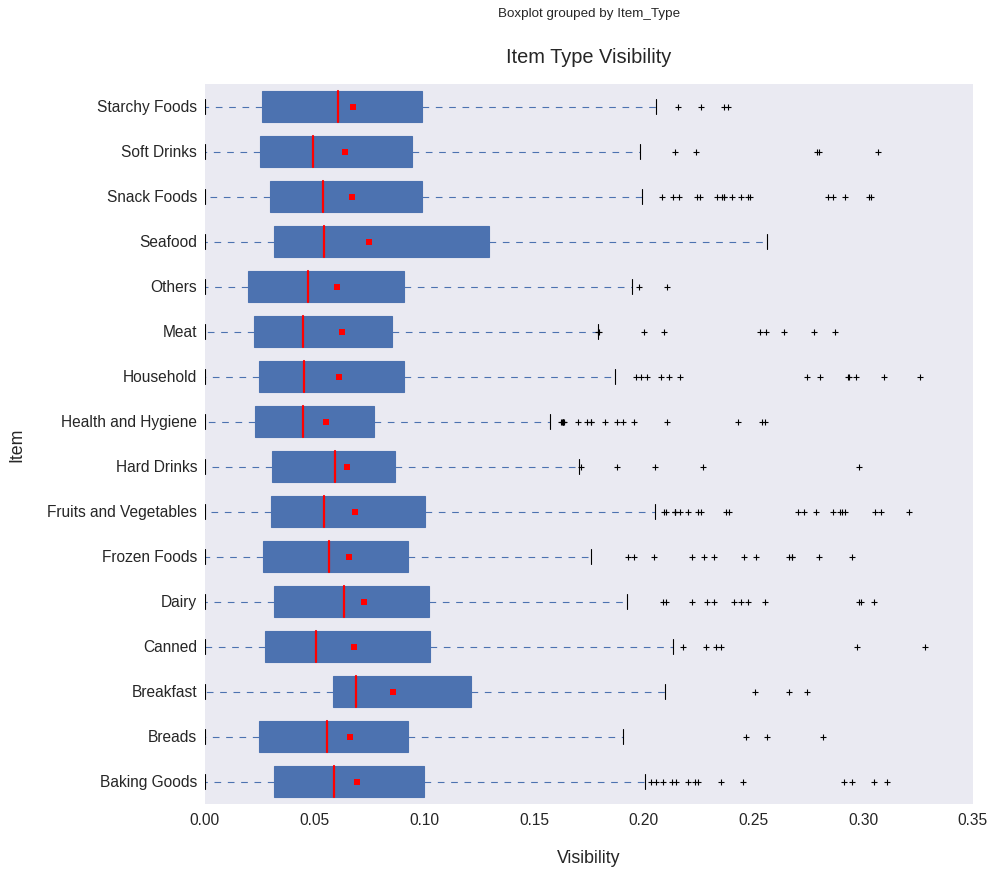

In [29]:
plt.style.use('seaborn')
df.boxplot(by='Item_Type', column='Item_Visibility', figsize=(12,12), vert=False, grid=False, fontsize=14, widths = .7, patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='red'), showmeans=True, showcaps=True);
plt.ylabel('Item', fontsize=16, labelpad=20)
plt.xlabel('Visibility', fontsize=16, labelpad=20)
plt.title('Item Type Visibility', fontsize=18, pad=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('visibility.png', bbox_inches='tight')
plt.show()

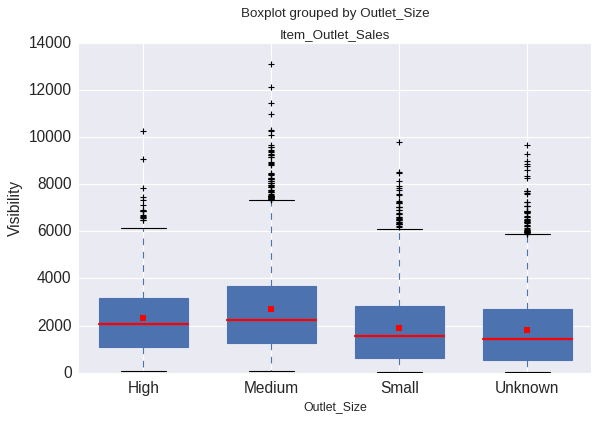

In [30]:
plt.style.use('seaborn')
df.boxplot(by='Outlet_Size', column='Item_Outlet_Sales', fontsize=14, widths = .7, patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='red'), showmeans=True, showcaps=True);
plt.ylabel('Visibility', fontsize=14);

Heatmap of the correlation between features.

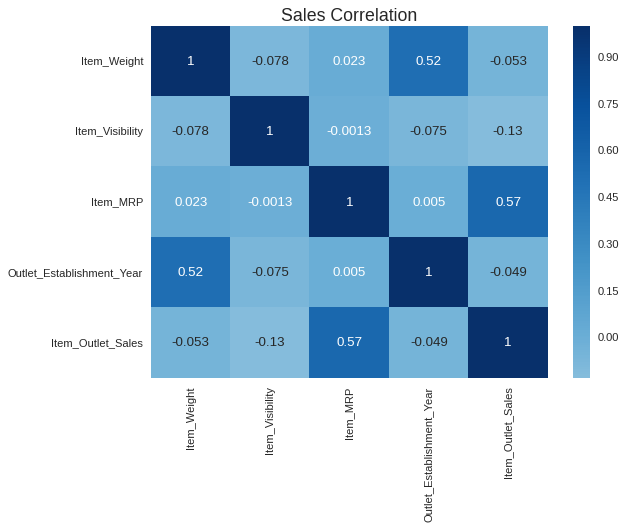

In [31]:
sns.heatmap(df.corr(),center=0, cmap='Blues', annot=True).set_title('Sales Correlation', fontsize=16);
plt.savefig('Correlation.png', bbox_inches='tight')

# Project 1 - Part 4 (Core)

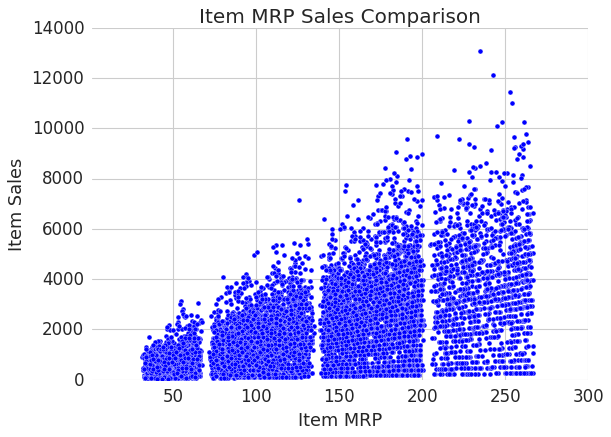

In [32]:
sns.set_style('whitegrid')
df.plot.scatter('Item_MRP','Item_Outlet_Sales', c='b')
plt.title('Item MRP Sales Comparison', fontsize=18)
plt.ylabel('Item Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=16)
plt.ylim(0,14000)
plt.xlim(1,300)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('MRP.png', bbox_inches='tight')
plt.savefig('MRP_sales.png', bbox_inches='tight')
plt.show()

<Figure size 400x400 with 0 Axes>

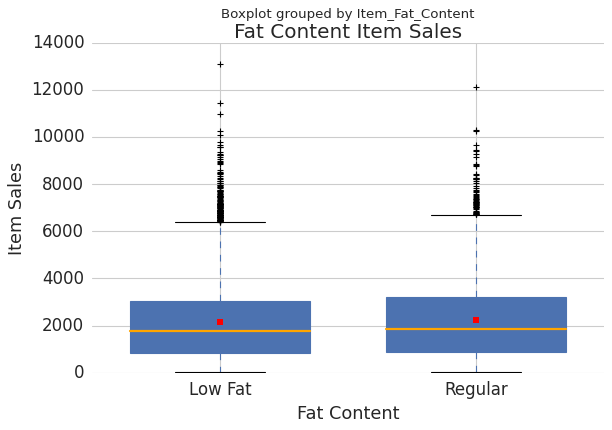

In [33]:
plt.figure(figsize = (5, 5))
df.boxplot(by='Item_Fat_Content', column='Item_Outlet_Sales', fontsize=14, widths = .7, patch_artist=True, medianprops = dict(linestyle='-', 
          linewidth=2, color='orange'), showmeans=True, showcaps=True)
boxprops = dict(linewidth=2, color='Black', facecolor = 'blue')
plt.ylabel('Item Sales', fontsize = 16)
plt.ylabel('Item Sales', fontsize = 16)
plt.xlabel('Fat Content', fontsize=16)
plt.title('Fat Content Item Sales', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [34]:
reg = df['Item_Fat_Content']=='Regular'
lf = df['Item_Fat_Content']=='Low Fat'
reg.sum()

3006

In [35]:
lf.sum()

5517

In [36]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
df[reg].value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
FDZ59            6.630        Regular           0.174111         Baking Goods  166.8500  OUT010             1998                       Unknown      Tier 3                Grocery Store      499.3500             1
FDJ26            15.300       Regular           0.085110         Canned        215.7218  OUT018             2009                       Medium       Tier 3                Supermarket Type2  1923.4962            1
FDJ34            0.000        Regular           0.093202         Snack Foods   125.5704  OUT027             1985                       Medium       Tier 3                Supermarket Type3  1001.3632            1
FDJ33            8.895        Regular           0.088822         Snack Foods   125.1730  OUT017             2007                       Unknown      Tier 2   

In [38]:
reg_group = df[reg].groupby('Item_Outlet_Sales')
reg_group.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Unknown,Tier 2,Supermarket Type1,468.7232
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360


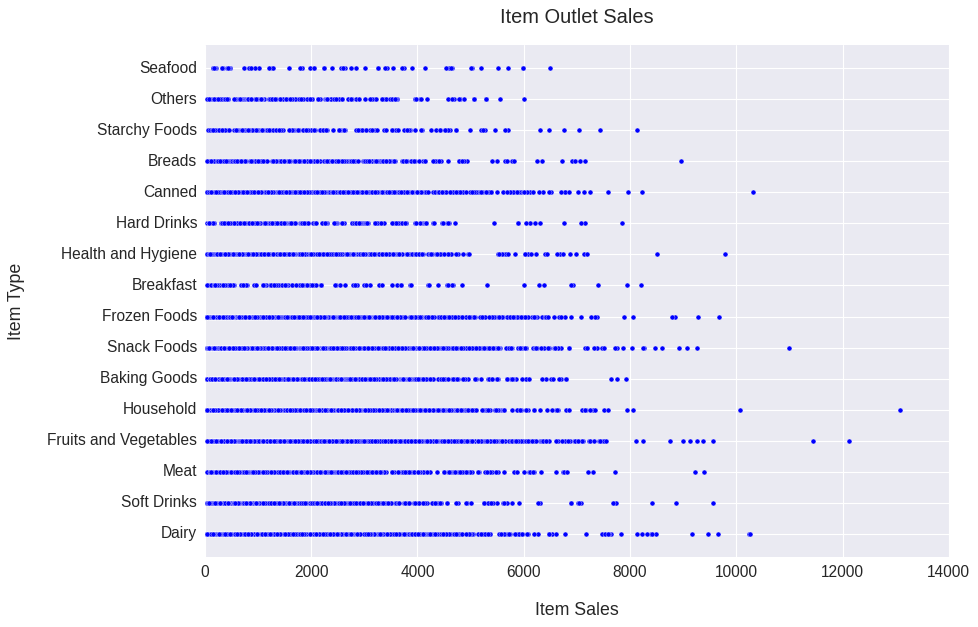

In [39]:
plt.style.use('seaborn')
df.plot.scatter('Item_Outlet_Sales', 'Item_Type', figsize=(12,8), grid=True, c='b')
plt.xlim(0,14000)
plt.title('Item Outlet Sales', fontsize=18, pad=20)
plt.ylabel('Item Type', fontsize=16, labelpad=20)
plt.xlabel('Item Sales', fontsize=16, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Project 1 Part 5(Core)

In [40]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [41]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year'], drop_first=True)

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0


In [43]:
X = df.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier'], axis=1)
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0.016047,249.8092,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5.920,0.019278,48.2692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,17.500,0.016760,141.6180,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,19.200,0.000000,182.0950,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,8.930,0.000000,53.8614,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
8520,10.600,0.035186,85.1224,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
8521,7.210,0.145221,103.1332,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [44]:
y = df.loc[:,'Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Linear Regression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
reg = LinearRegression()

In [47]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Training RMSE:",np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

Training RMSE: 1139.1040937388918
Testing RMSE: 1092.863081724149


In [49]:
reg.score(X_train,y_train)

0.5615551419174629

In [50]:
reg.score(X_test,y_test)

0.5671041872384917

In [51]:
reg.intercept_

-1375.7992684389242

In [52]:
cdf = pd.DataFrame(reg.coef_,X.columns,columns=['Coeff'])

Coefficient change in mean response for each feature.

In [53]:
cdf

,Coeff
Item_Weight,-1.941817
Item_Visibility,-423.390180
Item_MRP,15.720924
Item_Fat_Content_Regular,62.625234
Item_Type_Breads,-28.648318
Item_Type_Breakfast,45.361064
Item_Type_Canned,27.516194
Item_Type_Dairy,-106.335014
Item_Type_Frozen Foods,-1.770626
Item_Type_Fruits and Vegetables,45.754029


# Project 1 Final

Your task is to build tree based models to predict sales and compare evaluation metrics for regression problems.  

Build and evaluate a simple decision tree model.
Build and evaluate a bagged tree model.
Build and evaluate a random forest model.  
You now have tried at least 4 models on this data set (including the regression model from last week).  Compare the performance of your models based on r^2.
Compare the performance of your models based on rmse.  
Overall, which model do you recommend?

## Regression Tree

In [54]:
# Creating DTR
dec_tree = DecisionTreeRegressor(random_state=42, max_depth=4, max_leaf_nodes=15)

In [55]:
# Fiting training data to model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=15,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## Bagged Tree

In [56]:
bagreg = BaggingRegressor(random_state=42, bootstrap=True, bootstrap_features=True, max_samples=300, n_estimators=40)

In [57]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=300, n_estimators=40,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

## Random Forest

In [58]:
rf = RandomForestRegressor(random_state=42, max_depth=5, max_leaf_nodes=15)

In [59]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=15,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## R^2

In [60]:
# Obtaining scores R^2 for simple regression tree 
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.5794009783038534
0.5757070985338382


In [61]:
# Obtaining scores R^2 for bagging tree 
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.5917806064980723
0.5620890922991455


In [62]:
# Obtaining score R^2 for random forest
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.6047870310188126
0.6000962746682041


## RMSE

In [63]:
# Obtaining RMSE for simple regression tree 
print("Training RMSE:",np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train))))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test))))

Training RMSE: 1115.6810359941371
Testing RMSE: 1081.949388152111


In [64]:
# Obtaining RMSE for bagging tree 
print("Training RMSE:",np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))

Training RMSE: 1099.139305455706
Testing RMSE: 1099.1752582866181


In [65]:
# Obtaining RMSE for random forest
print("Training RMSE:",np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

Training RMSE: 1081.4875290793939
Testing RMSE: 1050.3929243381715


In [66]:
dec_tree.predict(X_test)

array([1753.09289327,  798.74995595,  798.74995595, ..., 3930.63800193,
       1753.09289327, 2846.43223336])